In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("exploring.ipynb")

# Instructions

This assignment lets you both define a strategy for picking the next point to explore and determine how you want to chop up a full path into way points. You'll need path_planning.py as well (for calculating the paths)

Note that there isn't a "right" answer for either of these. This is (mostly) a light-weight way to check your code for obvious problems before trying it in ROS. It's set up to make it easy to download a map and try some robot starting/ending points

Given to you:
- Image handling
- plotting
- Some structure for keeping/changing waypoints and converting to/from the map to the robot's coordinate space

Slides: https://docs.google.com/presentation/d/1tOUGoNDbzQeuzRwG-kJ-ipqDsCy3ABkIvNEdFmozRT8/edit?usp=sharing


In [2]:
# The ever-present numpy and matplot lib
import numpy as np

# Our priority queue
import heapq

# Using imageio to read in the image
import imageio

# Reading in map meta data
import yaml

In [3]:
import sys; 
sys.path.insert(0, '.')

# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

<!-- BEGIN QUESTION -->

# Run exploring a SLAM map



In [4]:
from path_planning import convert_image, dijkstra, open_image, plot_with_path
from exploring import find_all_possible_goals, find_best_point, plot_with_explore_points, find_waypoints

type of possible points:  <class 'list'>
possible points:  [(1854, 1874), (1856, 1859), (1856, 1859), (1856, 1859), (1856, 1861), (1856, 1861), (1856, 1862), (1856, 1861), (1856, 1862), (1856, 1863), (1856, 1862), (1856, 1863), (1856, 1864), (1856, 1863), (1856, 1864), (1856, 1865), (1856, 1864), (1856, 1865), (1856, 1866), (1856, 1865), (1856, 1866), (1856, 1867), (1856, 1866), (1856, 1867), (1856, 1868), (1856, 1867), (1856, 1868), (1856, 1869), (1856, 1868), (1856, 1869), (1856, 1870), (1856, 1869), (1856, 1870), (1856, 1871), (1856, 1870), (1856, 1871), (1856, 1872), (1856, 1871), (1856, 1872), (1856, 1873), (1854, 1874), (1856, 1872), (1856, 1873), (1856, 1874), (1854, 1874), (1856, 1873), (1856, 1874), (1856, 1875), (1854, 1874), (1856, 1874), (1856, 1875), (1856, 1876), (1856, 1875), (1856, 1876), (1856, 1877), (1856, 1876), (1856, 1877), (1856, 1878), (1856, 1877), (1856, 1878), (1856, 1879), (1856, 1878), (1856, 1879), (1856, 1880), (1856, 1879), (1856, 1880), (1856, 1881), (1

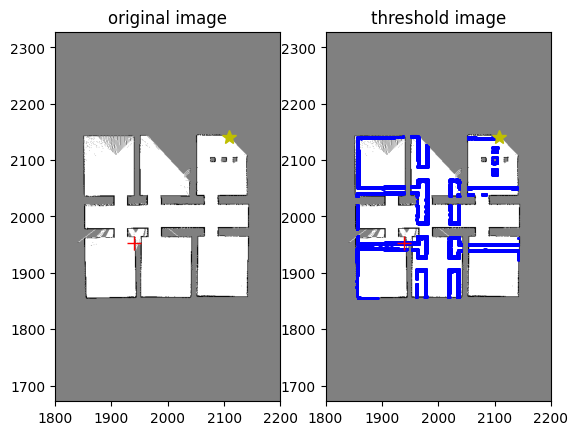

In [5]:
# You can use map or initial
im, im_thresh = open_image("map.pgm")

# Split into two pieces - find all of the points that are adjacent to an unknown area and a visible area
#    Then pick the best one
all_unseen = find_all_possible_goals(im_thresh)

robot_start_loc = (1940, 1953)
best_unseen = find_best_point(im_thresh, all_unseen, robot_loc=robot_start_loc)

# Note: This can be a little slow (it's drawing a lot of little points)
plot_with_explore_points(im_thresh, zoom=0.1, robot_loc=robot_start_loc, explore_points=all_unseen, best_pt=best_unseen)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

# Run waypoint generation on a pretend SLAM map
Note: This code assumes you have the previous problem completed

Best point is (2108, 2141)
Waypoints has 30 points of 287


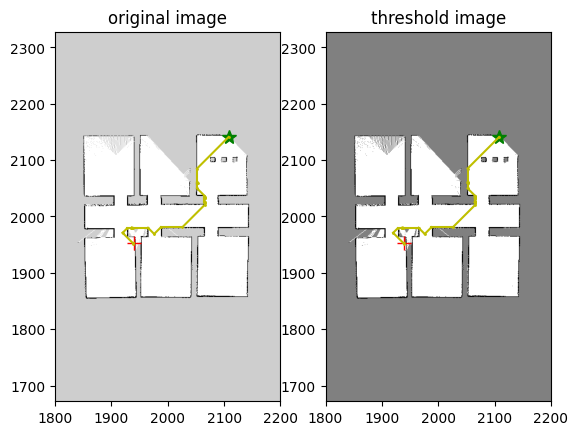

In [6]:
print(f"Best point is {best_unseen}")

path = dijkstra(im_thresh, robot_start_loc, best_unseen)
waypoints = find_waypoints(im_thresh, path)
plot_with_path(im, im_thresh, zoom=0.1, robot_loc=robot_start_loc, goal_loc=best_unseen, path=waypoints)
print(f"Waypoints has {len(waypoints)} points of {len(path)}")

<!-- END QUESTION -->

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [7]:

# List of names (creates a set)
worked_with_names = {"Gabriel J. (minimaly)"}
# List of URLS (creates a set)
websites = {"None"}
# Approximate number of hours, including lab/in-class time
hours = 2

# for all row, column in all_indices_from_where
#.   if this is the column for wrist torque 
#.      print(f"Row: {r}, Time step: {c // n_time_steps} Successful y/n: {pick_data[r, -1] == 1}, value: {pick_data[r, c]}")

In [8]:
grader.check("hours_collaborators")

hours_collaborators results:
    hours_collaborators - 1 result:
        ❌ Test case failed
        Trying:
            assert(not "not filled out" in worked_with_names)
        Expecting nothing
        **********************************************************************
        Line 1, in hours_collaborators 0
        Failed example:
            assert(not "not filled out" in worked_with_names)
        Exception raised:
            Traceback (most recent call last):
              File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/doctest.py", line 1357, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest hours_collaborators 0[0]>", line 1, in <module>
                assert(not "not filled out" in worked_with_names)
                                               ^^^^^^^^^^^^^^^^^
            NameError: name 'worked_with_names' is not defined

    hours_collaborators - 2 result:
        ❌ Test case failed
        Trying:
            assert(not "not filled out" in websites)
        Expecting nothing
        **********************************************************************
        Line 1, in hours_collaborators 1
        Failed example:
            assert(not "not filled out" in websites)
        Exception raised:
            Traceback (most recent call last):
              File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/doctest.py", line 1357, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest hours_collaborators 1[0]>", line 1, in <module>
                assert(not "not filled out" in websites)
                                               ^^^^^^^^
            NameError: name 'websites' is not defined

    hours_collaborators - 3 result:
        ❌ Test case failed
        Trying:
            assert(hours > 0)
        Expecting nothing
        **********************************************************************
        Line 1, in hours_collaborators 2
        Failed example:
            assert(hours > 0)
        Exception raised:
            Traceback (most recent call last):
              File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/doctest.py", line 1357, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest hours_collaborators 2[0]>", line 1, in <module>
                assert(hours > 0)
                       ^^^^^
            NameError: name 'hours' is not defined

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, Exploring, include this and both path_planning.py and exploring.py

In [9]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

AttributeError: module 'nbconvert' has no attribute 'pdf'